# Diffusion computation
https://github.com/alvason/diffusion-computation

### Lecture001 --- Diffusion equation with analytic solution
In a physical intuitive vision, an analytic solution is a crystal clear way for viewing the core. 
   
During numerical computation development, an analytic solution is one of the corner stones for checking the precision and efficiency of numerical algorithm.

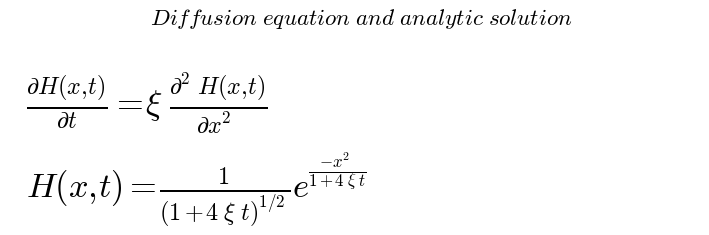

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/11/2015

In a physical intuitive vision, an analytic solution is a crystal clear way for viewing the core.
During numerical computation development, an analytic solution is one of the corner stones for checking the precision and efficiency of numerical algorithm.
'''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import IPython.display as idisplay
from mpl_toolkits.mplot3d.axes3d import Axes3D

AlvaFontSize = 23;
numberingFig = 0;

numberingFig = numberingFig + 1;
plt.figure(numberingFig, figsize=(12,3))
plt.axis('off')
plt.title(r'$ Diffusion \ equation \ and \ analytic \ solution $',fontsize = AlvaFontSize)
plt.text(0,1.0/2,r'$ \frac{\partial H(x,t)}{\partial t}=\xi \ \frac{\partial^2 H(x,t)}{\partial x^2} $', fontsize = 1.5*AlvaFontSize)
plt.text(0,0.0/2,r'$H(x,t) = \frac{1}{(1 + 4 \ \xi \ t)^{1/2}} e^\frac{-x^2}{1 + 4 \ \xi \ t}}$', fontsize = 1.5*AlvaFontSize)
plt.show()

# define GridXX function for making 2D-grid from 1D-grid
def AlvaGridXX(gridX, totalGPoint_Y):
    gridXX = gridX;
    for n in range(totalGPoint_Y - 1):
        gridXX = np.vstack((gridXX, gridX));
    return gridXX;
# checking both the gridXX function and the plotting function with matrix of gridXX

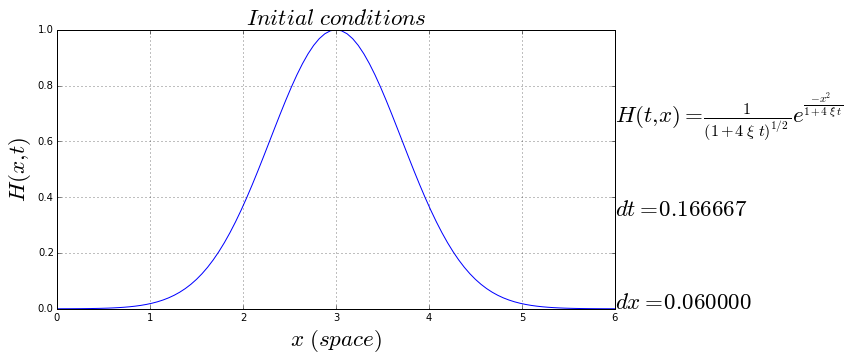

In [2]:
# Initial conditions
minX = float(0); maxX = float(6);
minT = float(0); maxT = float(10);

totalGPoint_X = int(100 + 1);
dx = (maxX - minX)/(totalGPoint_X - 1);
gridX = np.linspace(minX, maxX, totalGPoint_X); 

totalGPoint_T = int(60 + 1); 
dt = (maxT - minT)/(totalGPoint_T - 1);
gridT = np.linspace(minT, maxT, totalGPoint_T)

gridHtx = np.zeros([totalGPoint_T, totalGPoint_X])

movingRate = 1.0/4 # diffusion coefficience

tn = 0; # inital time = minT = gridT[tn = 0]
for xn in range(totalGPoint_X):
    gridHtx[tn, xn] = (1.0/np.sqrt(1.0+4.0*movingRate*gridT[tn]))*np.exp(-(gridX[xn]-(maxX-minX)/2.0)**2/(1.0+4.0*movingRate*gridT[tn]))

initialH = gridHtx.copy();

numberingFig = numberingFig + 1;
plt.figure(numberingFig,figsize=(10,5));     
plt.plot(gridX[:], gridHtx[:,:].T);
plt.grid(True)
plt.title(r'$ Initial \ conditions $', fontsize = AlvaFontSize);
plt.xlabel(r'$x \ (space)$', fontsize = AlvaFontSize); plt.ylabel(r'$H(x,t)$', fontsize = AlvaFontSize)
plt.text(maxX, 2.0/3, r'$H(t,x) = \frac{1}{(1 + 4 \ \xi \ t)^{1/2}} e^\frac{-x^2}{1 + 4 \ \xi \ t}}$', fontsize = AlvaFontSize);
plt.text(maxX, 1.0/3, r'$ dt = %f $'%(dt), fontsize = AlvaFontSize);
plt.text(maxX, minX, r'$ dx = %f $'%(dx), fontsize = AlvaFontSize); 
plt.show()

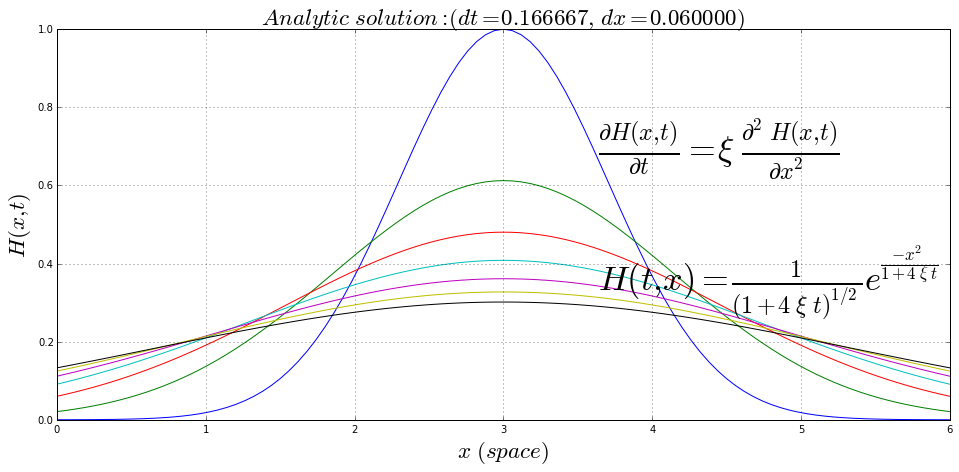

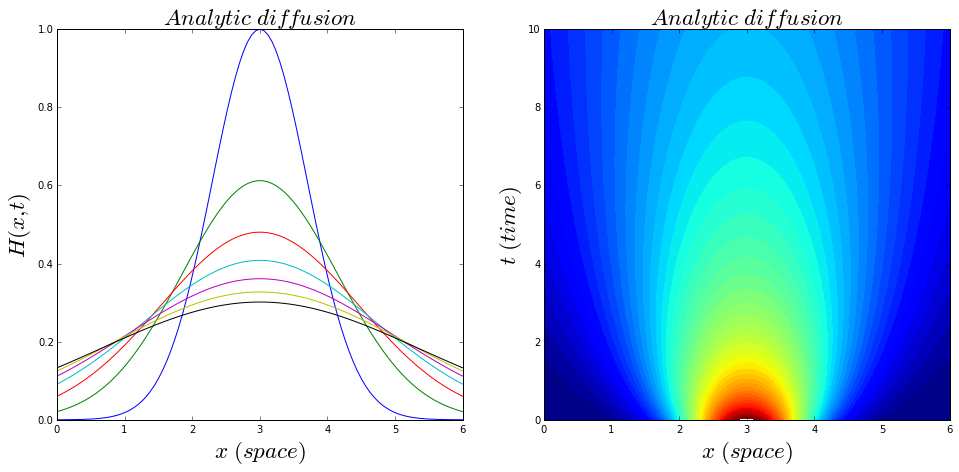

In [3]:
# Analytic solution
gridHtx_A = np.zeros([totalGPoint_T, totalGPoint_X]); # Define the space for analytic values

for tn in range(totalGPoint_T):  
    for xn in range(totalGPoint_X):
        gridHtx_A[tn,xn] = (1.0/np.sqrt(1.0 + 4.0*movingRate*gridT[tn]))*np.exp(-(gridX[xn]-(maxX-minX)/2.0)**2/(1.0+4.0*movingRate*gridT[tn]))


numberingFig = numberingFig + 1;
plt.figure(numberingFig,figsize=(16,7));     
plt.plot(gridX[:], gridHtx_A[::10].T);
plt.grid(True)
plt.title(r'$Analytic \ solution: (dt = %f,\ dx = %f) $'%(dt, dx), fontsize = AlvaFontSize);
plt.xlabel(r'$x \ (space)$', fontsize = AlvaFontSize); plt.ylabel(r'$H(x,t)$', fontsize = AlvaFontSize)
plt.text(maxX/1.65, 2.0/3, r'$ \frac{\partial H(x,t)}{\partial t}=\xi \ \frac{\partial^2 H(x,t)}{\partial x^2} $', fontsize = 1.5*AlvaFontSize)
plt.text(maxX/1.65, 1.0/3, r'$H(t,x) = \frac{1}{(1 + 4 \ \xi \ t)^{1/2}} e^\frac{-x^2}{1 + 4 \ \xi \ t}}$', fontsize = 1.5*AlvaFontSize);
plt.show()

# for 3D plotting
X = AlvaGridXX(gridX, totalGPoint_T); 
Y = AlvaGridXX(gridT, totalGPoint_X).T; 
Z = gridHtx_A;

numberingFig = numberingFig + 1;
figure = plt.figure(numberingFig,figsize=(16, 7)); 
figure1 = figure.add_subplot(1,2,1);
#figure1.pcolormesh(X, Y, Z); 
figure1.plot(gridX[:], gridHtx_A[::10].T);
figure1.set_title(r'$Analytic \ diffusion$', fontsize = AlvaFontSize); 
figure1.set_xlabel(r'$x \ (space)$', fontsize = AlvaFontSize);
#figure1.set_ylabel(r'$t \ (time)$', fontsize = AlvaFontSize); 
figure1.set_ylabel(r'$ H(x,t) $', fontsize = AlvaFontSize);
figure1.set_aspect('auto');

figure2 = figure.add_subplot(1,2,2);
figure2.contourf(X, Y, Z, levels = np.arange(0,1,0.02));
figure2.set_title('$Analytic \ diffusion$', fontsize = AlvaFontSize);
figure2.set_xlabel(r'$x \ (space)$', fontsize = AlvaFontSize);
figure2.set_ylabel(r'$t \ (time)$', fontsize = AlvaFontSize);
plt.show()

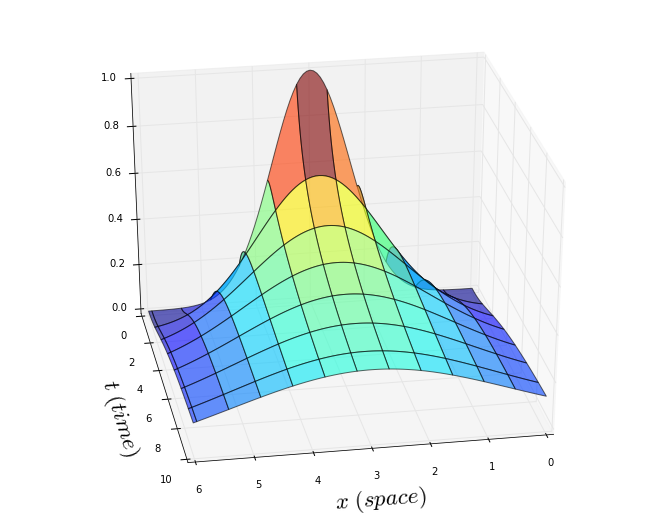

In [4]:
numberingFig = numberingFig + 1;
figure = plt.figure(numberingFig, figsize=(9, 7));
figure3D = Axes3D(figure)
figure3D.view_init(30, 80)

figure3D.plot_surface(X, Y, Z, rstride = 9, cstride = 9, alpha = 0.6, cmap = 'jet');
plt.xlabel(r'$x \ (space)$', fontsize = AlvaFontSize); plt.ylabel(r'$t \ (time)$', fontsize = AlvaFontSize)
plt.show()

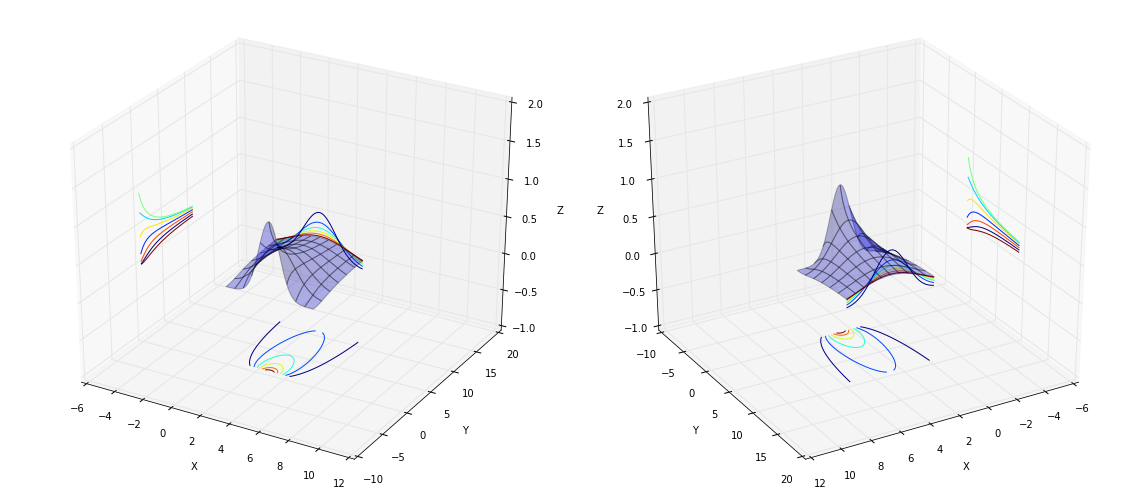

In [5]:
minY = minT; maxY = maxT;
minZ = 0; maxZ = 1;

numberingFig = numberingFig + 1;
figure = plt.figure(numberingFig, figsize=(16, 7));

figure1 = figure.add_subplot(1,2,1, projection='3d')
figure1.view_init(30, -60)

figure1.plot_surface(X, Y, Z, rstride = 10, cstride = 10, alpha = 0.3);
figure1.contour(X, Y, Z, zdir = 'x', offset = -(maxX - minX));
figure1.contour(X, Y, Z, zdir = 'y', offset = (maxY - minY));
figure1.contour(X, Y, Z, zdir = 'z', offset = -(maxZ - minZ));
figure1.set_xlabel('X');
figure1.set_xlim(minX - maxX, maxX + maxX);
figure1.set_ylabel('Y');
figure1.set_ylim(minY - maxY, maxY + maxY);
figure1.set_zlabel('Z');
figure1.set_zlim(minZ - maxZ, maxZ + maxZ);


figure2 = figure.add_subplot(1,2,2, projection='3d')
figure2.view_init(30, 60)

figure2.plot_surface(X, Y, Z, rstride = 10, cstride = 10, alpha = 0.3);
figure2.contour(X, Y, Z, zdir = 'x', offset = -(maxX - minX));
figure2.contour(X, Y, Z, zdir = 'y', offset = (maxY - minY));
figure2.contour(X, Y, Z, zdir = 'z', offset = -(maxZ - minZ));
figure2.set_xlabel('X');
figure2.set_xlim(minX - maxX, maxX + maxX);
figure2.set_ylabel('Y');
figure2.set_ylim(minY - maxY, maxY + maxY);
figure2.set_zlabel('Z');
figure2.set_zlim(minZ - maxZ, maxZ + maxZ);

figure.tight_layout()
plt.show()